In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# input은 length고, target은 weight다. 그러므로 모델은 처음으로 들어오는 데이터는 '길이'고, 내가 맞추는 것은 '무게'라는 것을 학습한 것.

In [7]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print(knr.predict([[50]]))
# predict 함수는 항상 2차원 배열을 입력 받아야 한다. 따라서 [[50]] 으로.

[1033.33333333]


43.333333333333336


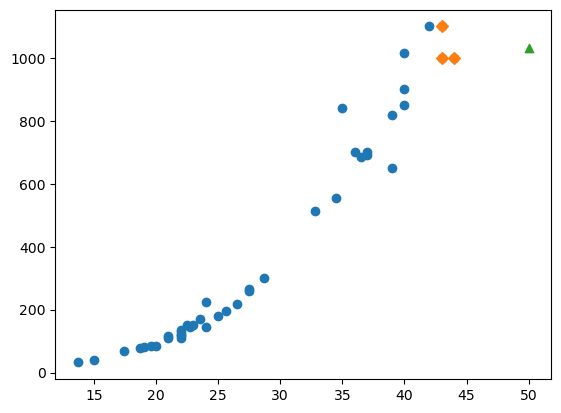

In [28]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
print(np.mean(train_input[indexes]))
# 왜 target 값을 쓰는 걸까? 
# 그건 바로 target이 무게니까!

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
# predict는 항상 2차원 배열을 매개 변수로 받기 때문에, 대괄호를 2번 씌워주는 것을 명심하자!

[1241.83860323]


In [32]:
print(lr.coef_, lr.intercept_)
# coef: 계수 or 가중치 / intercept: y 절편?

[39.01714496] -709.0186449535477


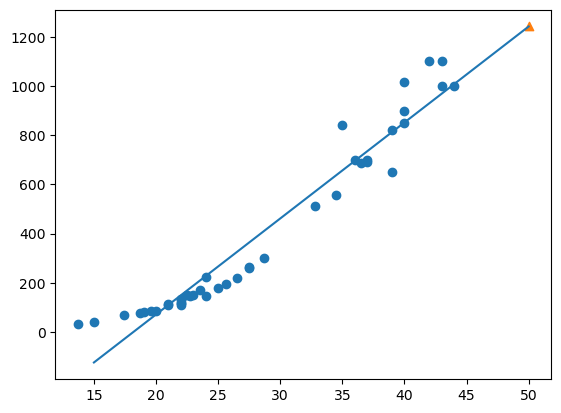

In [35]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 15일 때 y=15*39-709, 50일 때 y=50*39-709 두 점을 잇는 plot
plt.scatter(50, 1241.8, marker='^')

In [38]:
print(lr.score(test_input, test_target))
print(lr.score(train_input, train_target))
# input 을 먼저 넣고, 그 다음 target을 넣는 게 score() 메서드의 순서로구나!

0.8247503123313559
0.9398463339976041


In [41]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
train_poly.shape

(42, 2)

In [44]:
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
# 우리의 학습 data인 train_poly가 42, 2 즉, feature가 2개이므로?

[1573.98423528]


[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49]


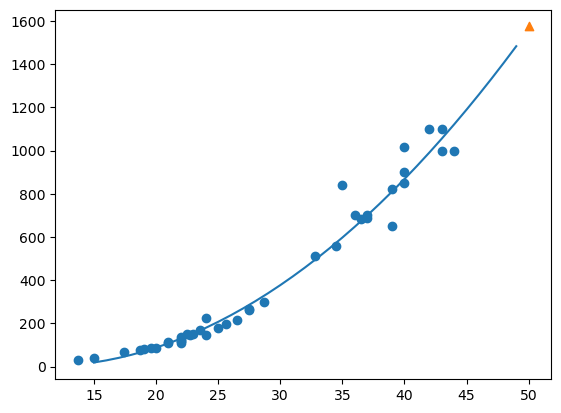

In [47]:
point = np.arange(15, 50)
print(point)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05)
plt.scatter(50, 1574, marker='^')

In [48]:
print(lr.score(train_poly, train_target))

0.9706807451768623
